In [1]:
import sys
sys.path.insert(0,'/home/djl34/kl_git/scripts')
from notebook_imports import *

client = Client()

/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45299 instead
  warnings.warn(


In [ ]:
bin_number = 9

neutral = os.path.join(KL_data_dir, f"whole_genome/freq_bins/freq_bin_{bin_number}_all.tsv")

neutral = pd.read_csv(neutral, sep = "\t")
neutral_sfs = neutral.drop(columns = ["mu", "sum"]).to_numpy()

In [4]:
neutral["mu"].iloc[0]

0.013

In [5]:
def make_dataframe(mu, length, window_num, transformation):
    log_list = []
    
    for i in range(window_num):
    
        neutral_sfs_mu = neutral_sfs[mu, :]
        array = np.random.multinomial(length, neutral_sfs_mu)
        neutral_sfs_mu = neutral_sfs_mu[None, ...]
        array = array[None, ...]
    
        winsfs_test = mlr.WinSFS(data = array, neutral_sfs = neutral_sfs_mu)
        
        log_list.append(winsfs_test.log_likelihood_ratio_cdf(transformation = transformation, reverse = True))

    df = pd.DataFrame(log_list)

    mu_pergen = neutral["mu"].iloc[mu] * per_generation_factor    
    df["mu"] = f"{mu_pergen:.1e}"
    df["window_length"] = length
    df["window_num"] = window_num

    return df

# def plot_histogram(mu, length, window_num):

#     df = make_dataframe(mu, length, window_num)

#     ax = sns.histplot(data=df, x=0, kde=False, stat='density', label='samples')

#     mu_actual = neutral["mu"].iloc[mu] * per_generation_factor

#     # calculate the pdf
#     x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
#     x_pdf = np.linspace(x0, x1, 100)
#     y_pdf = scipy.stats.norm.pdf(x_pdf)

#     ax.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')                                                   
#     ax.legend()

#     ax.set_title(f'Mu: {mu_actual} \n window length: {length} \n number of windows: {window_num}')
#     ax.set_xlabel('Z-score')

def make_large_dataframe(mu_list, length_list, window_num_list, transformation):
    first = True
    for mu in mu_list:
        for length in length_list:
            for window_num in window_num_list:
                df = make_dataframe(mu, length, window_num, transformation)
                if first:
                    df_all = df.copy()
                    first = False
                else:
                    df_all = pd.concat([df_all, df])

    return df_all

# make facetgrid

In [7]:
mu_list = [0,2, 5, 10, 30, 50]
length_list = [20, 100, 1000]
window_num_list = [1000]

In [8]:
df = make_large_dataframe(mu_list, length_list, window_num_list, "log")

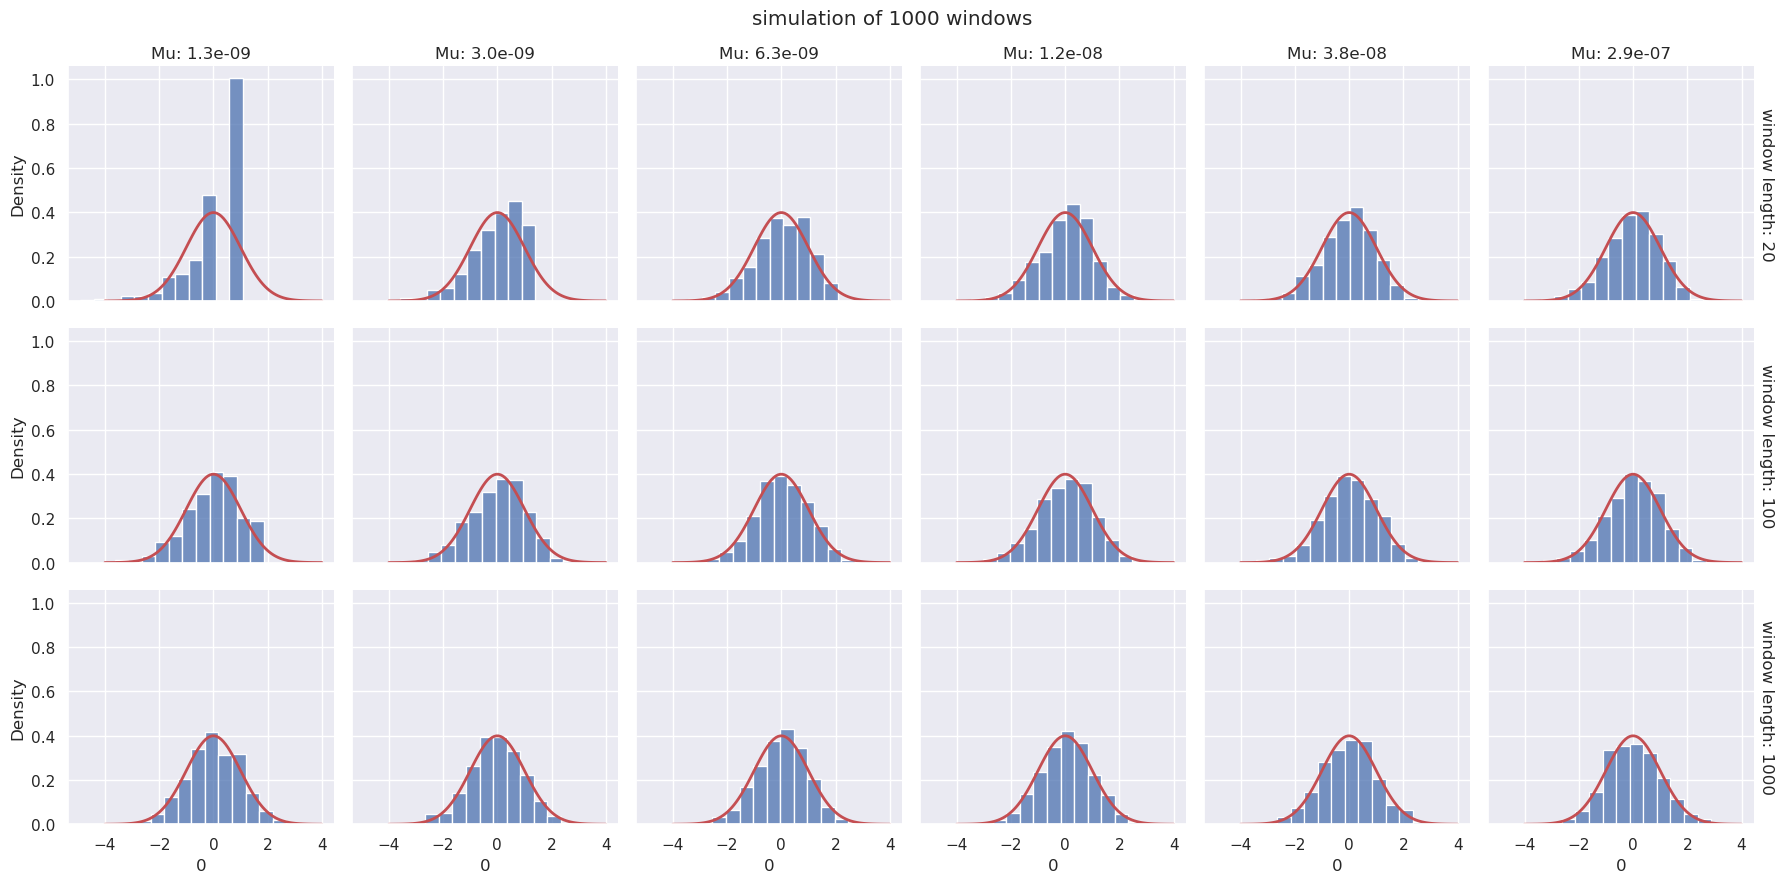

In [9]:
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df, col="mu", row="window_length", height=3, margin_titles=True)

g.map(sns.histplot, 0, binwidth=0.5, kde=False, stat='density', label='samples')

g.set_titles(col_template="Mu: {col_name}", row_template="window length: {row_name}")

g.fig.suptitle('simulation of 1000 windows')

def standard_normal(*args, **kwargs):
    # x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(-4, 4, 100)
    y_pdf = scipy.stats.norm.pdf(x_pdf)

    plt.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')   

g.map(standard_normal)


In [10]:
df_notransform = make_large_dataframe(mu_list, length_list, window_num_list, "none")

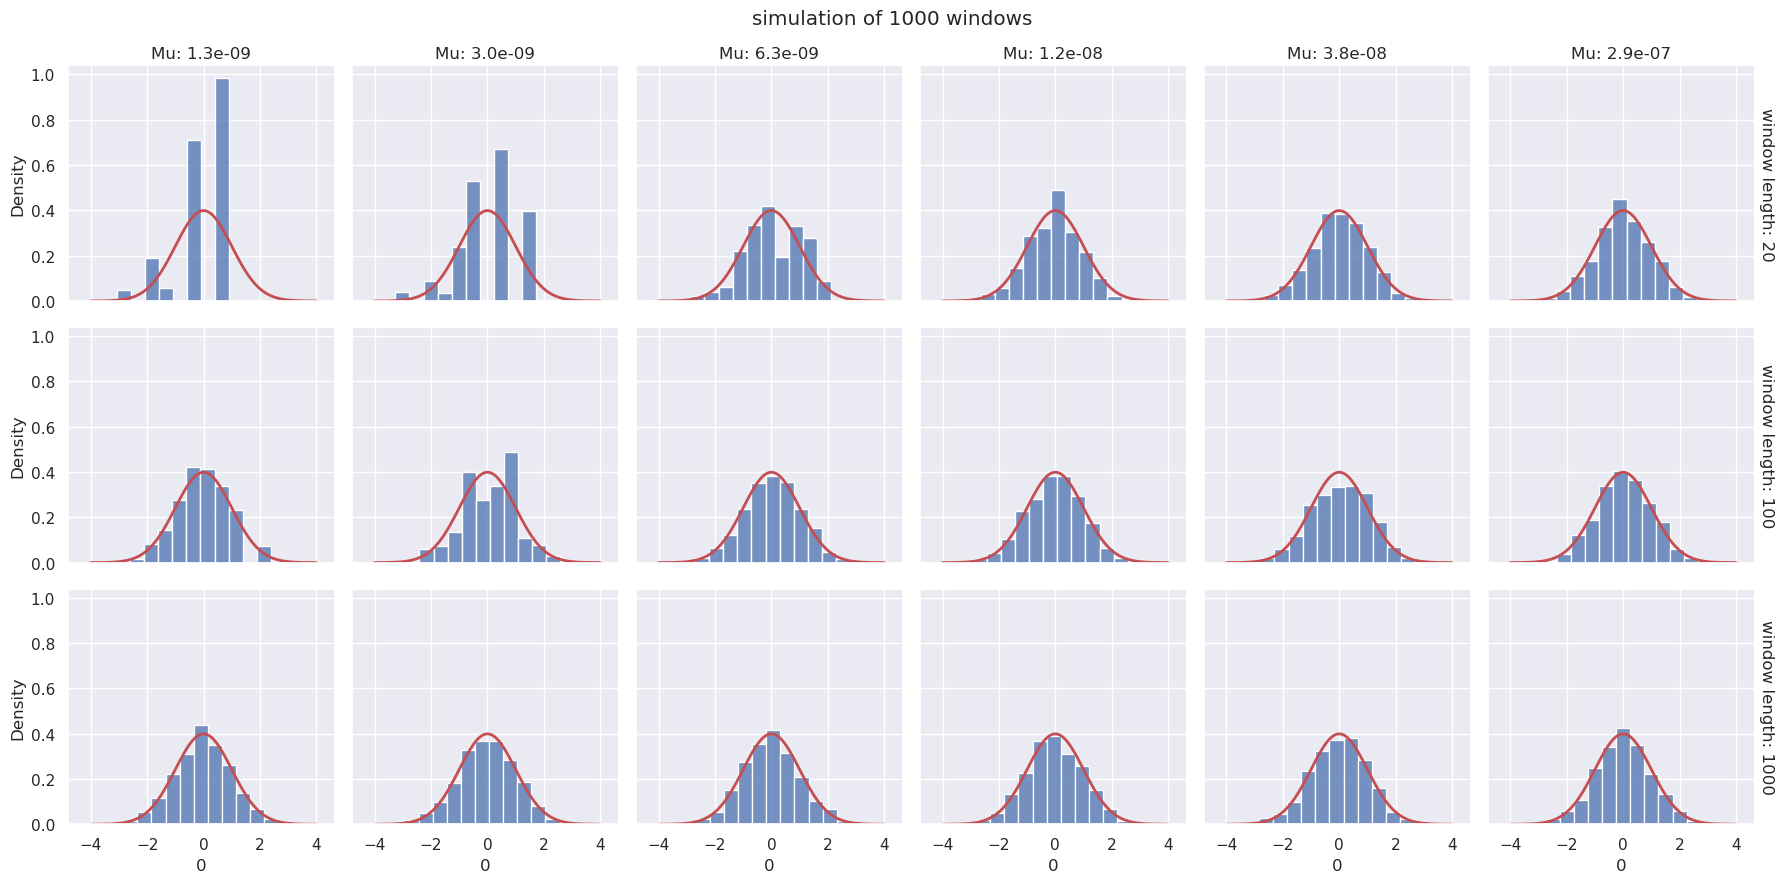

In [11]:
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df_notransform, col="mu", row="window_length", height=3, margin_titles=True)

g.map(sns.histplot, 0, binwidth=0.5, kde=False, stat='density', label='samples')

g.set_titles(col_template="Mu: {col_name}", row_template="window length: {row_name}")

g.fig.suptitle('simulation of 1000 windows')

def standard_normal(*args, **kwargs):
    # x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(-4, 4, 100)
    y_pdf = scipy.stats.norm.pdf(x_pdf)

    plt.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')   

g.map(standard_normal)


## Try for bin_number = 2

In [2]:
bin_number = 2

neutral = os.path.join(KL_data_dir, f"whole_genome/freq_bins/freq_bin_{bin_number}_all.tsv")

neutral = pd.read_csv(neutral, sep = "\t")
neutral_sfs = neutral.drop(columns = ["mu", "sum"]).to_numpy()

In [3]:
mu_list = [0,2, 5, 10, 30, 50]
length_list = [20, 100, 1000]
window_num_list = [1000]

In [8]:
df

,0,mu,window_length,window_num
0,0.847627,1.3e-09,20,1000
1,-2.818808,1.3e-09,20,1000
2,0.847627,1.3e-09,20,1000
3,-1.596663,1.3e-09,20,1000
4,-0.374518,1.3e-09,20,1000
...,...,...,...,...
995,0.072143,2.9e-07,1000,1000
996,1.252806,2.9e-07,1000,1000
997,-1.698852,2.9e-07,1000,1000
998,-0.518189,2.9e-07,1000,1000


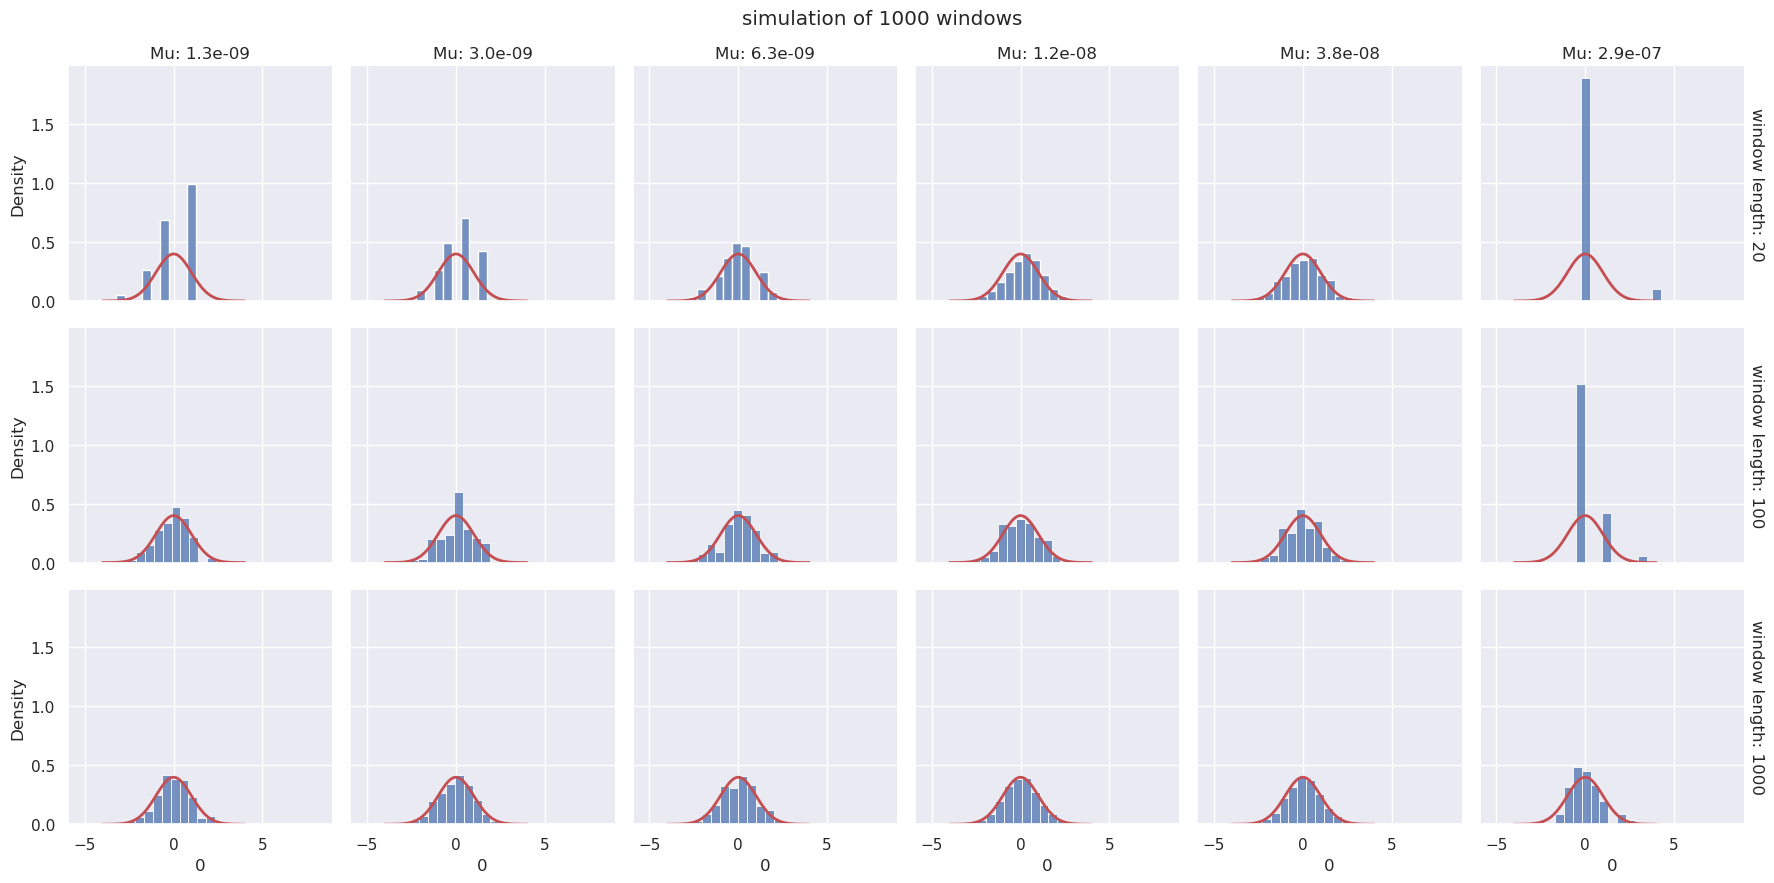

In [6]:
df = make_large_dataframe(mu_list, length_list, window_num_list, "log")

sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df, col="mu", row="window_length", height=3, margin_titles=True)

g.map(sns.histplot, 0, binwidth=0.5, kde=False, stat='density', label='samples')

g.set_titles(col_template="Mu: {col_name}", row_template="window length: {row_name}")

g.fig.suptitle('simulation of 1000 windows')

def standard_normal(*args, **kwargs):
    # x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(-4, 4, 100)
    y_pdf = scipy.stats.norm.pdf(x_pdf)

    plt.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')   

g.map(standard_normal)
